# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [44]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

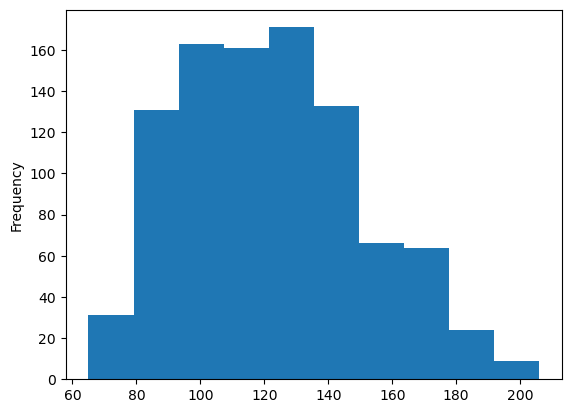

In [22]:
df['bpm'].plot(kind='hist')

In [24]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


<Axes: title={'center': 'Distribution of BPM'}, ylabel='Frequency'>

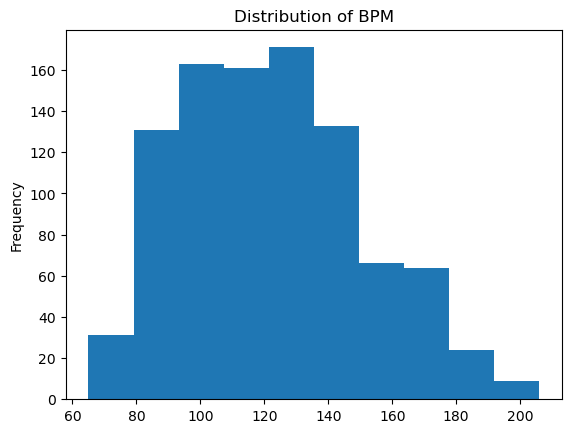

In [26]:
# Histogram of BPM
df['bpm'].plot(kind='hist', title="Distribution of BPM")

<Axes: title={'center': 'Boxplot of BPM'}>

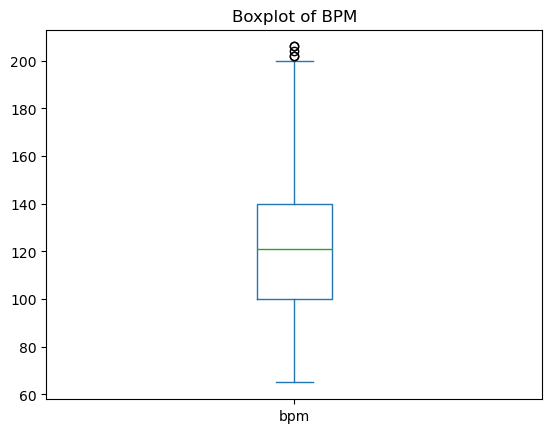

In [28]:
# Boxplot of BPM
df['bpm'].plot(kind='box', title="Boxplot of BPM")

In [30]:
# Summary stats
print("Mean BPM:", df['bpm'].mean())
print("Median BPM:", df['bpm'].median())
print("Mode BPM:", df['bpm'].mode()[0])

Mean BPM: 122.54039874081847
Median BPM: 121.0
Mode BPM: 120


<Axes: title={'center': 'Distribution of Keys'}, xlabel='key'>

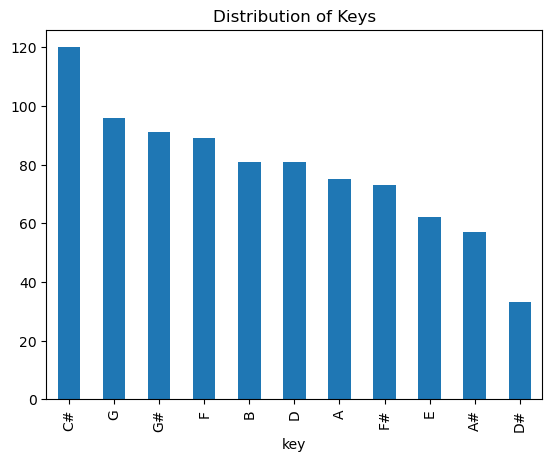

In [32]:
# Distribution of Keys
df['key'].value_counts().plot(kind='bar', title="Distribution of Keys")

<Axes: title={'center': 'Distribution of Modes'}, xlabel='mode'>

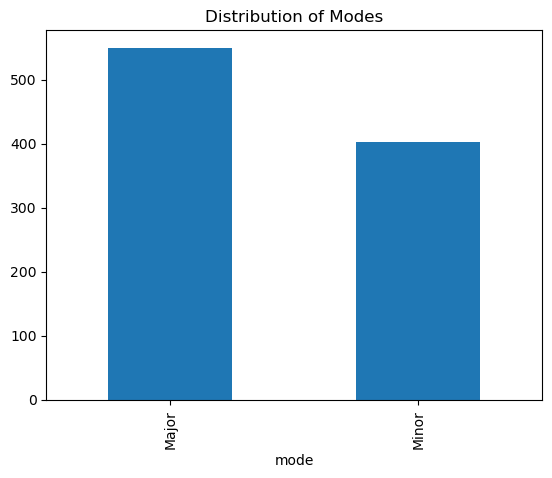

In [34]:
# Distribution of Modes
df['mode'].value_counts().plot(kind='bar', title="Distribution of Modes")


Feature: danceability_%
Mean: 66.96956977964324
Median: 69.0
Mode: 70

Feature: energy_%
Mean: 64.2791185729276
Median: 66.0
Mode: 74

Feature: speechiness_%
Mean: 10.131164742917104
Median: 6.0
Mode: 4

Feature: acousticness_%
Mean: 27.057712486883524
Median: 18.0
Mode: 0


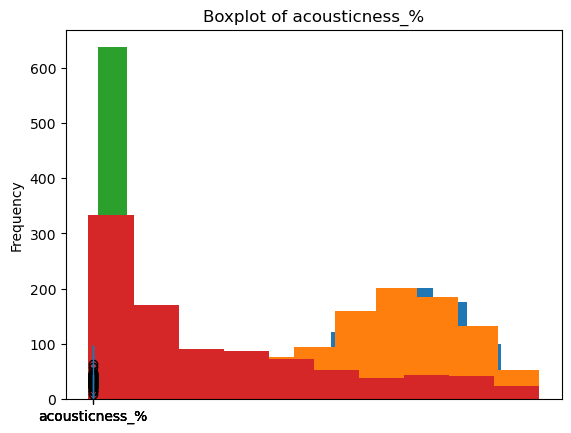

In [42]:
for col in ['danceability_%','energy_%','speechiness_%','acousticness_%']:
    print("\nFeature:", col)
    df[col].plot(kind='hist', title=f"Distribution of {col}")
    df[col].plot(kind='box', title=f"Boxplot of {col}")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])

In [38]:
filtered_df = df[
    (df['bpm'] >= 120) & (df['bpm'] <= 130) &
    (df['key'] == 'C#') &
    (df['mode'] == 'Minor') &
    (df['danceability_%'] >= 70) & (df['danceability_%'] <= 90) &
    (df['energy_%'] >= 60) & (df['energy_%'] <= 80) &
    (df['speechiness_%'] < 20) &
    (df['acousticness_%'] < 30)
]

filtered_df[['track_name','artist(s)_name','bpm','key','mode']].head()

,track_name,artist(s)_name,bpm,key,mode
8,fukumean,Gunna,130,C#,Minor
436,Ferrari,"James Hype, Miggy Dela Rosa",125,C#,Minor
841,"Villano Antillano: Bzrp Music Sessions, Vol. 51","Bizarrap, Villano Antillano",128,C#,Minor


In [40]:
# Example: Taylor Swift's "Cruel Summer"
df[df['track_name'].str.contains("Cruel Summer", case=False)][[
    'track_name','artist(s)_name','bpm','key','mode',
    'danceability_%','energy_%','speechiness_%','acousticness_%'
]]

,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
3,Cruel Summer,Taylor Swift,170,A,Major,55,72,15,11
